In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import alphalib
import portfolio

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True, na_values=-99.99)

In [4]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [5]:
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [6]:
columns = ['Lo 10', 'Hi 10']

In [7]:
returns = returns[columns]

In [8]:
returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [9]:
returns = returns / 100

In [10]:
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [11]:
returns.columns = ['SmallCap', 'LargeCap']

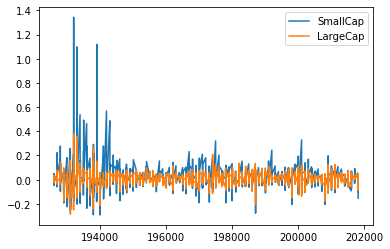

In [12]:
returns.plot()

In [13]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [14]:
returns.mean()

SmallCap    0.017598
LargeCap    0.008870
dtype: float64

In [15]:
annualized_vol = returns.std() * np.sqrt(12)

In [16]:
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [17]:
alphalib.annualized_vol(returns, 12)

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [18]:
return_per_month = (returns + 1).prod() ** (1 / len(returns)) - 1

In [19]:
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [20]:
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [21]:
annualized_return = (return_per_month + 1) ** 12 - 1

In [22]:
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [23]:
annualized_return / annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [24]:
risk_free = 0.04

In [25]:
sharpe = (annualized_return - risk_free) / annualized_vol

In [26]:
sharpe

SmallCap    0.346186
LargeCap    0.282834
dtype: float64

## Drawdown

### Calmar Ratio

Ratio of the annualized return over the trailing 36 months to the maximum drawdown over those 36 trailing months.

In [27]:
returns.index = pd.to_datetime(returns.index, format='%Y%m')

In [28]:
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [29]:
returns.index = returns.index.to_period('M')

In [30]:
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

## Compute drawdowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown, which is the wealth value as a percentage of the previous peak

In [31]:
wealth_index = 1000 * (1 + returns['LargeCap']).cumprod()

In [32]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

In [33]:
prev_peak = wealth_index.cummax()

In [34]:
prev_peak

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.078294e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    4.212246e+06
2018-11    4.212246e+06
2018-12    4.212246e+06
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

In [35]:
drawdown = (wealth_index - prev_peak) / prev_peak

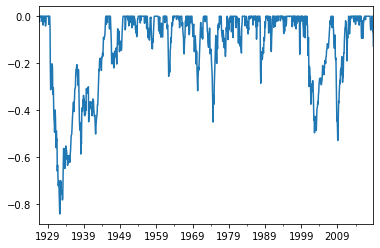

In [36]:
drawdown.plot()

In [37]:
drawdown.min()

-0.8400375277943123

In [38]:
drawdown['1975':].min()

-0.5280945042309304

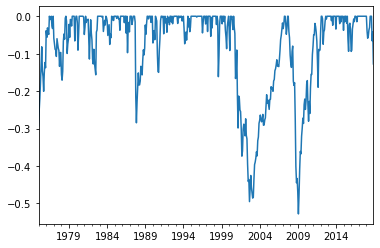

In [39]:
drawdown['1975':].plot()

In [40]:
drawdown['1975':].idxmin()

Period('2009-02', 'M')

In [41]:
def drawdown(returns):
    assert type(returns) is pd.Series, "Argument 'returns' must be pandas Series"
    
    wealth = (1 + returns).cumprod()   
    peaks = wealth.cummax()
    drawdowns = (wealth - peaks) / peaks
    
    return pd.DataFrame({
        'Index': wealth,
        'Peak': peaks,
        'Drawdown': drawdowns
    })

In [42]:
drawdown(returns['LargeCap'])

,Index,Peak,Drawdown
1926-07,1.032900,1.032900,0.000000
1926-08,1.071117,1.071117,0.000000
1926-09,1.078294,1.078294,0.000000
1926-10,1.052091,1.078294,-0.024300
1926-11,1.080498,1.080498,0.000000
...,...,...,...
2018-08,4175.915146,4175.915146,0.000000
2018-09,4212.245608,4212.245608,0.000000
2018-10,3935.501071,4212.245608,-0.065700
2018-11,4035.069249,4212.245608,-0.042062


In [43]:
# Calculate skewness
import scipy.stats

In [44]:
scipy.stats.skew(returns)

array([4.41073861, 0.23344522])

In [45]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [46]:
def semi_deviation(rets):
    return rets[rets < 0].std()

In [47]:
hf_data = alphalib.load_edhec_hfi_data()

In [48]:
hf_data.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [49]:
alphalib.var(hf_data)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
Name: 0.050000000000000044, dtype: float64

In [50]:
alphalib.var(hf_data, 'gaussian')

Convertible Arbitrage     0.021743
CTA Global                0.034308
Distressed Securities     0.021085
Emerging Markets          0.047266
Equity Market Neutral     0.008875
Event Driven              0.021196
Fixed Income Arbitrage    0.014615
Global Macro              0.018813
Long/Short Equity         0.026459
Merger Arbitrage          0.010466
Relative Value            0.013097
Short Selling             0.080236
Funds Of Funds            0.021341
dtype: float64

In [51]:
ind_data = alphalib.load_edhec_ind_data()

In [52]:
ind_data.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [96]:
alphalib.var(ind_data[['Food', 'Smoke', 'Coal', 'Beer', 'Fin']], 'gaussian')

Food     0.068261
Smoke    0.084193
Coal     0.167113
Beer     0.106259
Fin      0.101383
dtype: float64

In [99]:
industries = ['Food', 'Beer', 'Smoke', 'Coal']

In [100]:
rets = ind_data['1996':'2000'][industries]

In [106]:
alphalib.cagr(rets, 12)

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [126]:
weights = np.repeat(0.25, 4)
p = portfolio.Portfolio(rets, 12, weights)
p.get_return()

0.1893122878226381

In [129]:
ind2 = ['Games', 'Fin']
n_points = 20
weights = [np.array([x, 1 - x]) for x in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [130]:
portfolios = [portfolio.Portfolio(ind_data['1996':'2000'][ind2], 12, w) for w in weights]

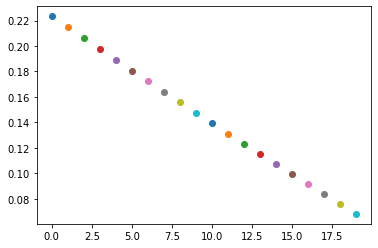

In [134]:
for i, p in enumerate(portfolios):
    plt.scatter(i, p.get_return())

In [135]:
from sklearn.linear_model import LinearRegression

In [136]:
lr = LinearRegression()

In [137]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)